In [19]:
# imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates, ticker
import datetime

In [20]:
# parameters for ploting
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.linewidth"] = 1.5

In [21]:
# Data Columns names
names = ['StartTime','Diff','A0','A1','A2','A3','En','Op1','Op2','Op3','A0K','A1K','A2K','A3K','A0C','A1C','A2C','A3C',
'SuccCount','Crash','A0Kclean','A1Kclean','A2Kclean','A3Kclean','A0Cclean','A1Cclean','A2Cclean','A3Cclean']

#Importing data - Tab from Google docs spreadsheet
df = pd.read_csv('505thDataTemp - OrganisedDataForDownload.csv',header=0,names=names)
df['StartTime'] = pd.to_datetime(df.StartTime)
df = df.sort_values('StartTime').reset_index(drop=True)

In [22]:
Enl = ['Automatons','Terminids','Illuminates']

In [23]:
# Basic Calculations
df['OpK'] = df.A1K+df.A2K+df.A3K+df.A0K # total Killcount per mission
df['OpC'] = df.A1C+df.A2C+df.A3C+df.A0C # total deathcount per mission
df['OpKclean'] = df.A1Kclean+df.A2Kclean+df.A3Kclean+df.A0Kclean # total Killcount per mission - excluding corrupted/missing data
df['OpCclean'] = df.A1Cclean+df.A2Cclean+df.A3Cclean+df.A0Cclean # total deathcount per mission - excluding corrupted/missing data
df['Opcount'] = 1
df['DateOnly'] = df.StartTime.dt.date
for E in Enl:
    df['TK_'+E] = df[df.En==E].OpK.cumsum()
    df['TK_'+E]=df['TK_'+E].ffill().fillna(0)
    df['TC_'+E] = df[df.En==E].OpC.cumsum()
    df['TC_'+E]=df['TC_'+E].ffill().fillna(0)

# Sample Data report - 505th Ressugence regiment
This report comprises Information gatehred from a few deployments form the 505th. The stats team thanks the collaboarion of hosts on supplying this data

In [24]:
print('This report presents data of', str(len(df)), 'deployments. In the same period, there were 1229 registered deployments in the regiment roster')

This report presents data of 19 deployments. In the same period, there were 1229 registered deployments in the regiment roster


# Deployment graphs

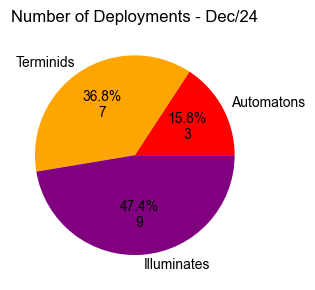

In [40]:
cl = ['red','orange','purple']
def func(pct, allvalues):
    absolute = int(pct / 100.*(np.sum(allvalues)+1))
    return "{:.1f}%\n{:d}".format(pct, absolute)

fig,ax = plt.subplots(figsize=(6,3))
plot1 = []
for i in range(3):
    plot1.append(len(df[df.En==Enl[i]]))
ax.pie(plot1,labels=Enl,colors=cl,autopct=lambda pct: func(pct,plot1))
ax.set_title('Number of Deployments - Dec/24')
# ax.set_xticks(np.arange(3)+width,Enl)
# ax.legend(loc='best')
# Change to pie chart

plt.tight_layout()

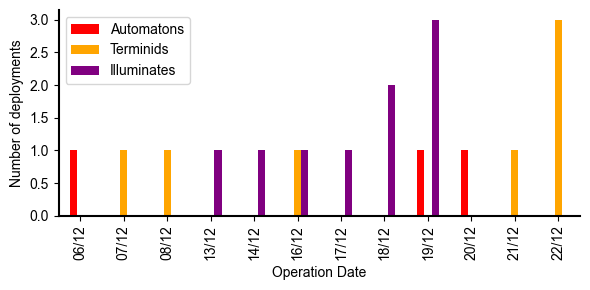

In [26]:
cl = ['red','orange','purple']
# fig,ax = plt.subplots(figsize=(6,3))
dfp = df.copy()
dfp.loc[dfp.En=='Automatons','Automatons']=1
dfp.loc[dfp.En=='Terminids','Terminids']=1
dfp.loc[dfp.En=='Illuminates','Illuminates']=1
dfp=dfp.fillna(0)
dfp = dfp[['DateOnly','Automatons','Terminids','Illuminates']].groupby(by=['DateOnly']).sum()

ax = dfp.plot.bar(figsize=(6,3),color=cl)

ticks = [tick.get_text() for tick in ax.get_xticklabels()]
ticks = pd.to_datetime(ticks).strftime('%d/%m')
ax.set_xticklabels(ticks)

ax.set_xlabel('Operation Date')
ax.set_ylabel('Number of deployments')
ax.legend(loc='best')
# ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m"))
plt.tight_layout()

# Kill & Casualty graphs

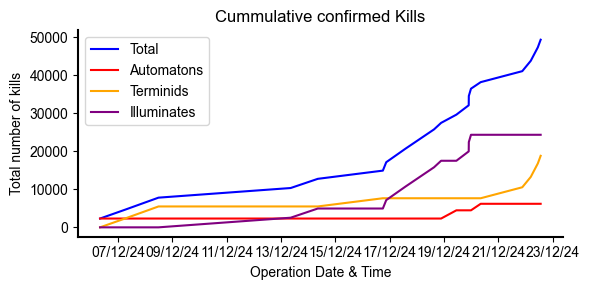

In [27]:
cl = ['red','orange','purple']
fig,ax = plt.subplots(figsize=(6,3))
ax.plot(df.StartTime,df.OpK.cumsum(),'-b',label='Total')
for i in range(3):
    ax.plot(df.StartTime,df['TK_'+Enl[i]],'-',color=cl[i],label=Enl[i])
ax.set_xlabel('Operation Date & Time')
ax.set_ylabel('Total number of kills')
ax.set_title('Cummulative confirmed Kills')
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%y"))
ax.legend(loc='best')
plt.tight_layout()

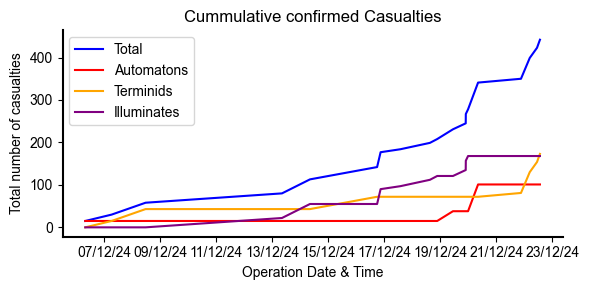

In [28]:
cl = ['red','orange','purple']
fig,ax = plt.subplots(figsize=(6,3))
ax.plot(df.StartTime,df.OpC.cumsum(),'-b',label='Total')
for i in range(3):
    ax.plot(df.StartTime,df['TC_'+Enl[i]],'-',color=cl[i],label=Enl[i])
ax.set_xlabel('Operation Date & Time')
ax.set_ylabel('Total number of casualties')
ax.set_title('Cummulative confirmed Casualties')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%y"))
plt.tight_layout()

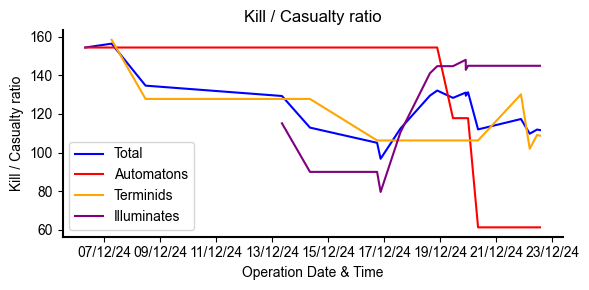

In [29]:
cl = ['red','orange','purple']
fig,ax = plt.subplots(figsize=(6,3))
ax.plot(df.StartTime,df.OpK.cumsum()/df.OpC.cumsum(),'-b',label='Total')
for i in range(3):
    ax.plot(df.StartTime,df['TK_'+Enl[i]]/df['TC_'+Enl[i]],'-',color=cl[i],label=Enl[i])
ax.set_xlabel('Operation Date & Time')
ax.set_ylabel('Kill / Casualty ratio')
ax.set_title('Kill / Casualty ratio')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%y"))
plt.tight_layout()

## Data statistics

In [30]:
print('Missions affected by crashes or missing data: ',str(df.Crash.sum()),' out of ',str(3*df.Opcount.sum()),' --- ',str(round(100*df.Crash.sum()/(3*df.Opcount.sum()),2)),'%')

Missions affected by crashes or missing data:  6  out of  57  ---  10.53 %


In [31]:
print('Successfull operations: ',str(len(df[df.SuccCount==3])),' out of ',str(df.Opcount.sum()),' --- ',str(round(100*len(df[df.SuccCount==3])/(df.Opcount.sum()),2)),'%')

Successfull operations:  16  out of  19  ---  84.21 %


In [32]:
print('Average Kills per Deployment (All three operations): ', str(round(df.OpK.mean(),1)),' --- ',str(round(df.OpK.mean()/4,1)),' per helldiver')
print('Average Casualties per Deployment (All three operations): ', str(round(df.OpC.mean(),1)),' --- ',str(round(df.OpC.mean()/4,1)),' per helldiver')
print('Average Kills/Casualty ratio: ', str(round(df.OpK.mean()/df.OpC.mean(),1)))

Average Kills per Deployment (All three operations):  2598.1  ---  649.5  per helldiver
Average Casualties per Deployment (All three operations):  23.3  ---  5.8  per helldiver
Average Kills/Casualty ratio:  111.7


 ### <span style="color:red">Automatons</span>

In [33]:
def prAut(skk): print("\033[91m {}\033[00m" .format(skk))
dfp = df[df.En=='Automatons']
prAut('Average Kills per Deployment (All three operations): '+ str(round(dfp.OpK.mean(),1))+' --- '+str(round(dfp.OpK.mean()/4,1))+' per helldiver')
prAut('Average Casualties per Deployment (All three operations): '+ str(round(dfp.OpC.mean(),1))+' --- '+str(round(dfp.OpC.mean()/4,1))+' per helldiver')
prAut('Average Kills/Casualty ratio: '+ str(round(dfp.OpK.mean()/dfp.OpC.mean(),1)))

 Average Kills per Deployment (All three operations): 2065.0 --- 516.2 per helldiver
 Average Casualties per Deployment (All three operations): 33.7 --- 8.4 per helldiver
 Average Kills/Casualty ratio: 61.3


 ### <span style="color:Orange">Terminids</span>

In [34]:
def prTer(skk): print("\033[33m {}\033[00m" .format(skk))
dfp = df[df.En=='Terminids']
prTer('Average Kills per Deployment (All three operations): '+ str(round(dfp.OpK.mean(),1))+' --- '+str(round(dfp.OpK.mean()/4,1))+' per helldiver')
prTer('Average Casualties per Deployment (All three operations): '+ str(round(dfp.OpC.mean(),1))+' --- '+str(round(dfp.OpC.mean()/4,1))+' per helldiver')
prTer('Average Kills/Casualty ratio: '+ str(round(dfp.OpK.mean()/dfp.OpC.mean(),1)))

 Average Kills per Deployment (All three operations): 2688.1 --- 672.0 per helldiver
 Average Casualties per Deployment (All three operations): 24.7 --- 6.2 per helldiver
 Average Kills/Casualty ratio: 108.8


 ### <span style="color:purple">Illuminates</span>

In [35]:
def prIll(skk): print("\033[95m {}\033[00m" .format(skk))
dfp = df[df.En=='Illuminates']
prIll('Average Kills per Deployment (All three operations): '+ str(round(dfp.OpK.mean(),1))+' --- '+str(round(dfp.OpK.mean()/4,1))+' per helldiver')
prIll('Average Casualties per Deployment (All three operations): '+ str(round(dfp.OpC.mean(),1))+' --- '+str(round(dfp.OpC.mean()/4,1))+' per helldiver')
prIll('Average Kills/Casualty ratio: '+ str(round(dfp.OpK.mean()/dfp.OpC.mean(),1)))

 Average Kills per Deployment (All three operations): 2705.7 --- 676.4 per helldiver
 Average Casualties per Deployment (All three operations): 18.7 --- 4.7 per helldiver
 Average Kills/Casualty ratio: 144.9


In [36]:

# cl = ['red','orange','purple']
# fig,ax = plt.subplots(figsize=(6,3))
# ax.plot(df.StartTime,df.OpK.cumsum(),'-ob')
# for i in range(3):
#     dfp = df[df.En==Enl[i]]
#     ax.plot(dfp.StartTime,dfp.OpK.cumsum(),'-o',color=cl[i])
# #     ax.plot(dfp.StartTime,dfp.OpKclean.cumsum(),'-o',color=cl[i],alpha=0.4)
# ax.set_xlabel('Operation Date & Time')
# ax.set_ylabel('Total number of kills')
# ax.set_title('Cummulative confirmed Kills')
# plt.tight_layout()